In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("E:/Data Science/Modules/Module 4(ML)/KNN/Data/column_2C_weka.csv")
df

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [3]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
df.shape

(310, 7)

In [5]:
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [7]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [8]:
df["class"].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

#### **Data Visualisation**

class
Abnormal    AxesSubplot(0.125,0.125;0.775x0.755)
Normal      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

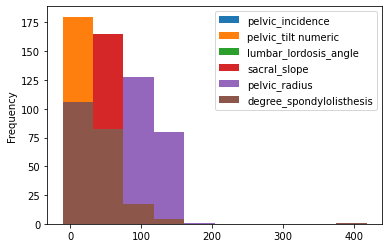

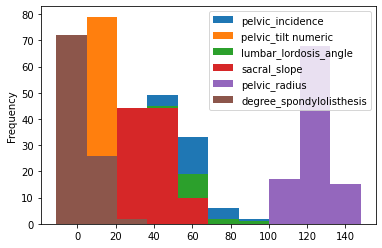

In [9]:
df.groupby("class").plot(kind = "hist")

class
Abnormal    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
Normal      [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

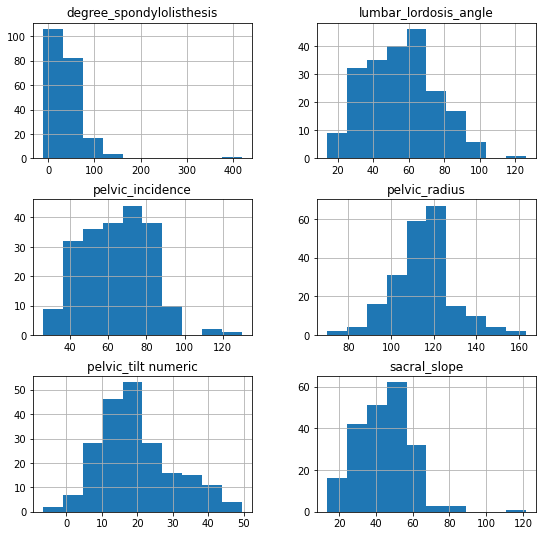

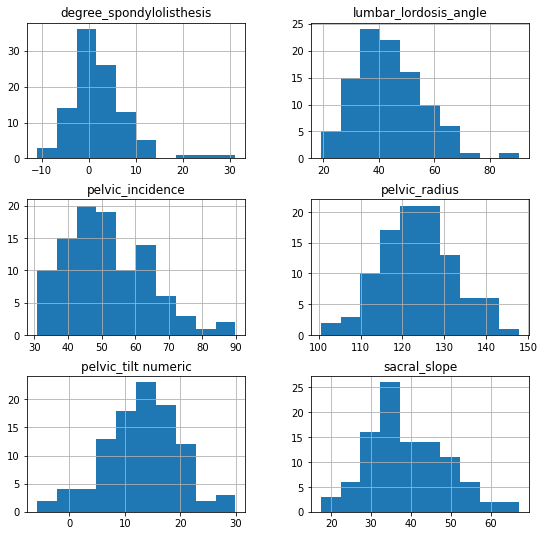

In [10]:
df.groupby("class").hist(figsize=(9,9))

#### **Feature Scaling**

In [11]:
num_col = df.columns[0:6]

x = df[num_col]
y = df["class"]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_new = scaler.fit_transform(x)
x_new

array([[0.35568788, 0.51989984, 0.22917997, 0.2508573 , 0.30746116,
        0.02514839],
       [0.12450104, 0.2967831 , 0.09857833, 0.14462935, 0.47664891,
        0.03636497],
       [0.41166648, 0.51393229, 0.32299466, 0.30766054, 0.38609692,
        0.0175229 ],
       ...,
       [0.34043781, 0.52244298, 0.28789745, 0.23490726, 0.59779618,
        0.01943732],
       [0.18425678, 0.27235174, 0.24684569, 0.21462279, 0.52117504,
        0.02624045],
       [0.07420202, 0.20770855, 0.20261992, 0.14251659, 0.57924032,
        0.02527676]])

In [12]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


#### **Train test split**

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.3)

In [14]:
print("Training feature set size:",x_train.shape)
print("Test feature set size:",x_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (217, 6)
Test feature set size: (93, 6)
Training variable set size: (217,)
Test variable set size: (93,)


#### **Model fitting & training**

In [15]:
acc_value = []  # we imported accuracy function so, we have to calculate acc_value
for K in range(20):
    K=K+1
    
    model = KNeighborsClassifier(n_neighbors = K)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    accuracy = model.score(x_test, y_test)
    
    acc_value.append(accuracy)
    
    print("Accuracy Score for k= " , K , "is:", accuracy)

Accuracy Score for k=  1 is: 0.7849462365591398
Accuracy Score for k=  2 is: 0.8494623655913979
Accuracy Score for k=  3 is: 0.8387096774193549
Accuracy Score for k=  4 is: 0.8494623655913979
Accuracy Score for k=  5 is: 0.8494623655913979
Accuracy Score for k=  6 is: 0.8602150537634409
Accuracy Score for k=  7 is: 0.8387096774193549
Accuracy Score for k=  8 is: 0.8602150537634409
Accuracy Score for k=  9 is: 0.8387096774193549
Accuracy Score for k=  10 is: 0.8709677419354839
Accuracy Score for k=  11 is: 0.8172043010752689
Accuracy Score for k=  12 is: 0.8387096774193549
Accuracy Score for k=  13 is: 0.8172043010752689
Accuracy Score for k=  14 is: 0.8279569892473119
Accuracy Score for k=  15 is: 0.8172043010752689
Accuracy Score for k=  16 is: 0.8494623655913979
Accuracy Score for k=  17 is: 0.8172043010752689
Accuracy Score for k=  18 is: 0.8279569892473119
Accuracy Score for k=  19 is: 0.8172043010752689
Accuracy Score for k=  20 is: 0.8172043010752689


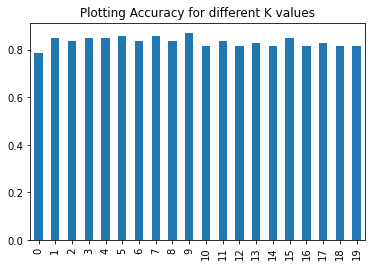

In [16]:
curve = pd.DataFrame(acc_value)
curve.plot(kind = "bar", title = "Plotting Accuracy for different K values", legend =  False )

In [23]:
final_model = KNeighborsClassifier(n_neighbors = 9)
final_model.fit(x_train, y_train)

y_pred = final_model.predict(x_test)

### **Evaluation**

In [24]:
print("Accuracy from sklearn: {0}".format(final_model.score(x_test, y_test)))
#Return the mean accuracy on the given test data and labels.

Accuracy from sklearn: 0.8387096774193549


In [25]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred, labels = ["Abnormal", "Normal"])
#The confusion matrix lays out the correctly and incorrectly classified cases in a tabular format

# Predicted Positive	Predicted Negative
# Actual Positive	True Positive	False Negative
# Actual Negative	False Positive	True Negative

print(metrics.classification_report(y_test, y_pred, labels = ["Abnormal", "Normal"]))
# In classification_report (printing the precision and recall, among other metrics)

              precision    recall  f1-score   support

    Abnormal       0.93      0.83      0.88        66
      Normal       0.68      0.85      0.75        27

    accuracy                           0.84        93
   macro avg       0.80      0.84      0.82        93
weighted avg       0.86      0.84      0.84        93



In [26]:
data = {"y_actual": y_test,
       "y_predicted": y_pred}

df_check = pd.DataFrame(data, columns = ["y_actual", "y_predicted"])

In [27]:
df_check.head()

,y_actual,y_predicted
255,Normal,Abnormal
246,Normal,Abnormal
78,Abnormal,Abnormal
145,Abnormal,Abnormal
258,Normal,Normal


Text(0.5, 15.0, 'Predicted label')

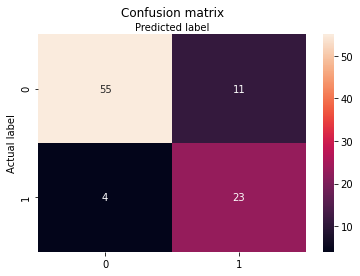

In [28]:
class_names = [0,1]
fig, ax = plt.subplots()
# tick_marks = np.arange(len(class_names))

# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True) # annot = annot : bool or rectangular dataset, optional,If True, write the data value in each cell.

ax.xaxis.set_label_position("top")
plt.tight_layout         # Automatically adjust subplot parameters to give specified padding.

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')